In [296]:
import numpy as np
import tensorflow as tf

from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [509]:
n_data = 50
x = np.sort(np.random.uniform(low=-5, high=5, size=n_data)).astype(np.float32)
y = (x + np.cos(np.pi*x) + (.1 + .9*np.sin(10*np.pi*x))*np.random.randn(n_data)).astype(np.float32)

x_test = (np.random.uniform(low=-5, high=5, size=n_data)).astype(np.float32)

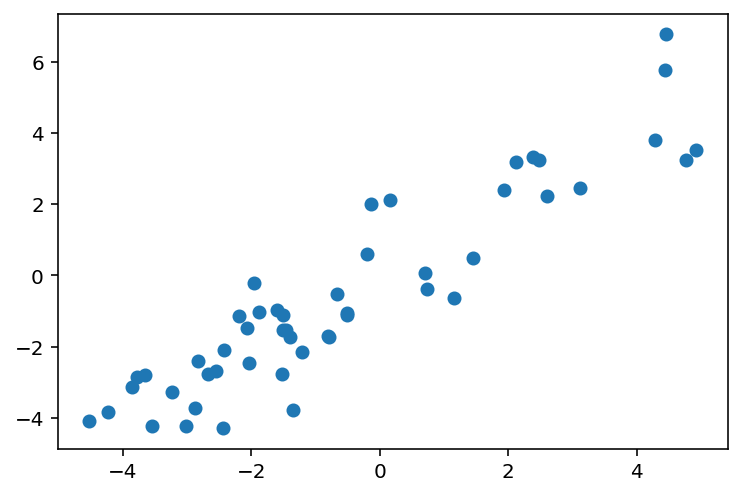

In [510]:
plt.scatter(x,y)

In [511]:
d = 2
N = 30
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
for i in range(d):
    if i == 0:
        model.add(Dense(N, batch_input_shape=(None, 1), kernel_initializer='glorot_normal', activation='tanh', use_bias=False))
    else:
        model.add(Dense(N))
model.add(Dense(1))

In [512]:
def K(x,y):
    with tf.GradientTape(persistent=True) as tape:

        out_x = model(np.array(x.reshape(-1, 1)))
        out_y = model(np.array(y.reshape(-1, 1)))

    Jx = tape.jacobian(out_x, model.trainable_weights)
    gx = np.concatenate([g.numpy().reshape((len(x), -1)) for g in Jx], -1)

    Jy = tape.jacobian(out_y, model.trainable_weights)
    gy = np.concatenate([g.numpy().reshape((len(y), -1)) for g in Jy], -1)

    return gx @ gy.T

In [513]:
Theta = K(x,x)
chi = K(x_test,x)

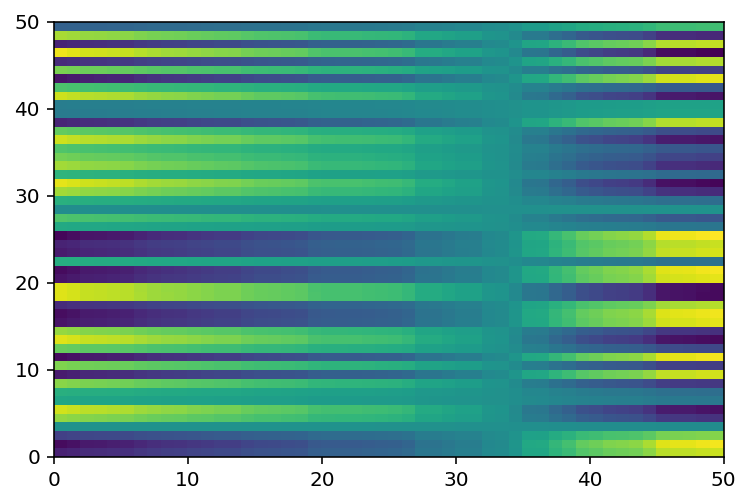

In [514]:
plt.pcolor(chi)

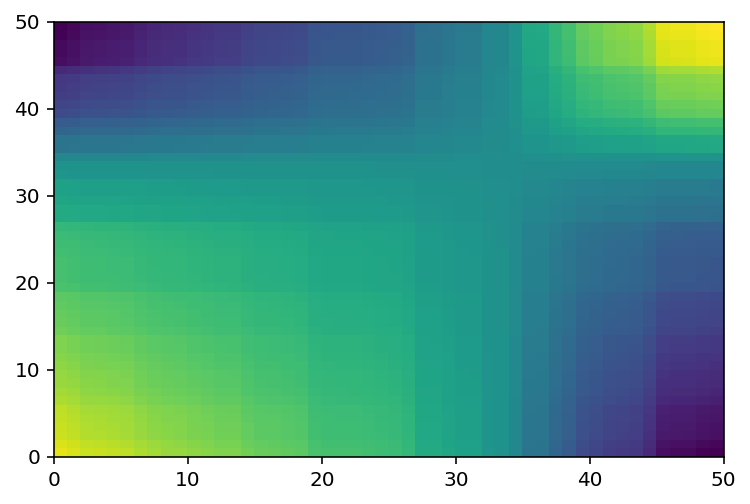

In [515]:
plt.pcolor(Theta)

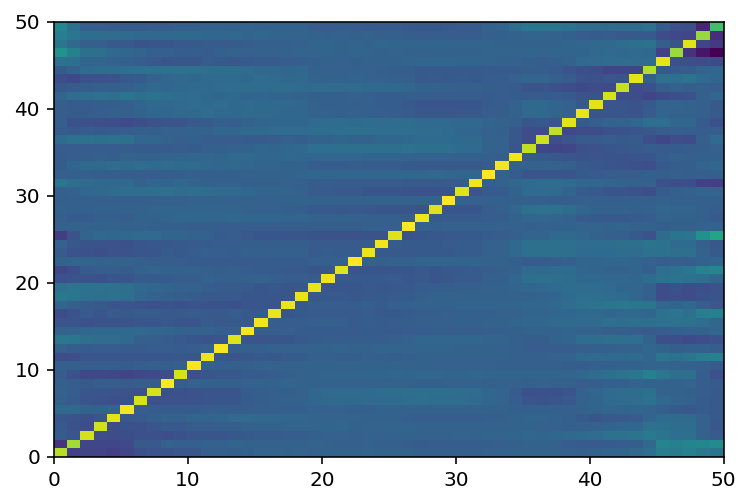

In [516]:
plt.pcolor((chi + .001*np.eye(len(x))) @ np.linalg.inv(Theta + .001*np.eye(len(x))))

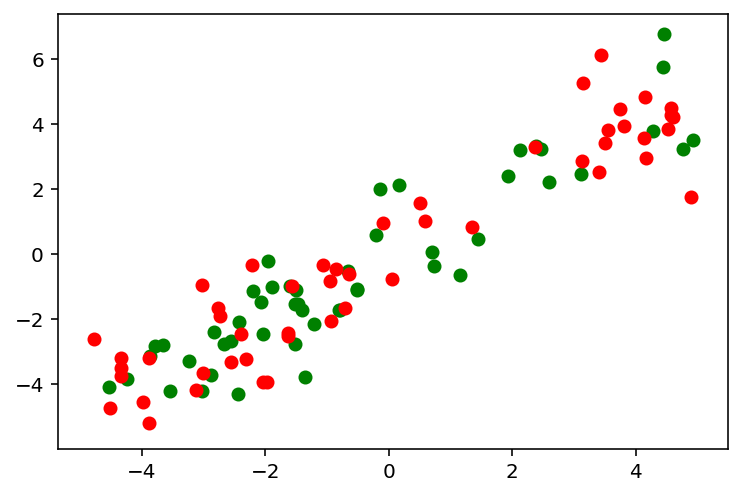

In [517]:
plt.scatter(x, y, color = 'green')
plt.scatter(x_test, ((chi + .001*np.eye(len(x))) @ np.linalg.pinv(Theta + .001*np.eye(len(x))) @ y), color='red')